<a href="https://colab.research.google.com/github/rizkyfauziilmi/TUGAS_UAS_ML/blob/main/clustering_data_kecil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import kagglehub

# Dataset 1: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
path_df = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
# Dataset 2: https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction
path_df2 = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")

In [218]:
import pandas as pd

df = pd.read_csv(path_df + "/Mall_Customers.csv")
df2 = pd.read_csv(path_df2 + "/Obesity prediction.csv")

In [219]:
print("Dataset 1:")
display(df.head())

print("\nDataset 2:")
display(df2.head())

Dataset 1:


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Dataset 2:


Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [220]:
print("\nDataset 1 Info:")
display(df.info())

print("\nDataset 2 Info:")
display(df2.info())


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), o

None

## Data Cleaning

### Standarisasi Nama Kolom

In [221]:
import re

def sanitize_column_names(data: pd.DataFrame) -> pd.DataFrame:
    """
    Membersihkan nama kolom DataFrame dengan cara:
    - Menghapus isi dalam tanda kurung beserta tanda kurungnya.
    - Menghapus semua spasi.
    - Menghapus karakter selain huruf (hanya huruf a-z dan A-Z yang dipertahankan).

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame yang kolomnya ingin dibersihkan.

    Returns
    -------
    pd.DataFrame
        DataFrame dengan nama kolom yang sudah dibersihkan.
    """
    cleaned_columns = []
    for col in data.columns:
        col = re.sub(r'\([^)]*\)', '', col)  # Hilangkan isi dalam tanda kurung dan tanda kurungnya
        col = re.sub(r'\s+', '', col)  # Hilangkan semua spasi
        col = re.sub(r'[^a-zA-Z]', '', col)  # Hilangkan karakter selain huruf
        cleaned_columns.append(col)

    data.columns = cleaned_columns
    return data

#### Dataset 1

In [222]:
print("\nKolom-kolom yang telah dibersihkan dari dataset 1:")
df_clean = sanitize_column_names(df)
print(df_clean.columns)


Kolom-kolom yang telah dibersihkan dari dataset 1:
Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


#### Dataset 2

In [223]:
print("\nKolom-kolom yang telah dibersihkan dari dataset 2:")
df2_clean = sanitize_column_names(df2)
print(df2_clean.columns)


Kolom-kolom yang telah dibersihkan dari dataset 2:
Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')


### Atasi Data Duplicate

#### Dataset 1

In [224]:
print("\nJumlah duplikat pada dataset 1:")
df_clean.duplicated().sum()


Jumlah duplikat pada dataset 1:


0

#### Dataset 2

In [225]:
print("\nJumlah duplikat pada dataset 2:")
df2_clean.duplicated().sum()


Jumlah duplikat pada dataset 2:


24

In [226]:
df2_clean.drop_duplicates(inplace=True)

print("\nJumlah duplikat pada dataset 2 setelah penghapusan:")
df2_clean.duplicated().sum()


Jumlah duplikat pada dataset 2 setelah penghapusan:


0

### Atasi Data Missing

#### Dataset 1

In [227]:
print("\nJumlah nilai yang hilang pada dataset 1:")
df_clean.isnull().sum()


Jumlah nilai yang hilang pada dataset 1:


CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

#### Dataset 2

In [228]:
print("\nJumlah nilai yang hilang pada dataset 2:")
df2_clean.isnull().sum()


Jumlah nilai yang hilang pada dataset 2:


Gender           0
Age              0
Height           0
Weight           0
familyhistory    0
FAVC             0
FCVC             0
NCP              0
CAEC             0
SMOKE            0
CHO              0
SCC              0
FAF              0
TUE              0
CALC             0
MTRANS           0
Obesity          0
dtype: int64

### Atasi Data Anomali Numerikal 

#### Dataset 1

In [229]:
print("\nStatistik deskriptif untuk dataset 1:")
df_clean.describe()


Statistik deskriptif untuk dataset 1:


CustomerID         Age  AnnualIncome  SpendingScore
count  200.000000  200.000000    200.000000     200.000000
mean   100.500000   38.850000     60.560000      50.200000
std     57.879185   13.969007     26.264721      25.823522
min      1.000000   18.000000     15.000000       1.000000
25%     50.750000   28.750000     41.500000      34.750000
50%    100.500000   36.000000     61.500000      50.000000
75%    150.250000   49.000000     78.000000      73.000000
max    200.000000   70.000000    137.000000      99.000000

#### Dataset 2

In [230]:
print("\nStatistik deskriptif untuk dataset 2:")
df2_clean.describe()


Statistik deskriptif untuk dataset 2:


Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

               CHO          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

### Atasi Data Anomali Kategorikal

In [231]:
def describe_categorical_columns(df: pd.DataFrame) -> None:
    """
    Menampilkan deskripsi ringkas untuk setiap kolom kategorikal pada DataFrame.

    Fungsi ini akan:
    - Mendeteksi kolom bertipe kategorikal (object/category).
    - Menampilkan nama kolom dan distribusi nilai (termasuk NaN jika ada) untuk setiap kolom kategorikal.
    - Jika tidak ada kolom kategorikal, akan mencetak pesan informasi.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang ingin dianalisis kolom kategorikalnya.

    Returns
    -------
    None
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("Tidak ada kolom kategorial dalam DataFrame.")
        return

    for col in categorical_cols:
        print(f"\nKolom: {col}")
        print(df[col].value_counts(dropna=False))  # Termasuk NaN jika ada


#### Dataset 1

In [232]:
print("\nDeskripsi Kolom Kategorial untuk Dataset 1:")
describe_categorical_columns(df_clean)


Deskripsi Kolom Kategorial untuk Dataset 1:

Kolom: Gender
Gender
Female    112
Male       88
Name: count, dtype: int64


#### Dataset 2

In [233]:
print("\nDeskripsi Kolom Kategorial untuk Dataset 2:")
describe_categorical_columns(df2_clean)


Deskripsi Kolom Kategorial untuk Dataset 2:

Kolom: Gender
Gender
Male      1052
Female    1035
Name: count, dtype: int64

Kolom: familyhistory
familyhistory
yes    1722
no      365
Name: count, dtype: int64

Kolom: FAVC
FAVC
yes    1844
no      243
Name: count, dtype: int64

Kolom: CAEC
CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

Kolom: SMOKE
SMOKE
no     2043
yes      44
Name: count, dtype: int64

Kolom: SCC
SCC
no     1991
yes      96
Name: count, dtype: int64

Kolom: CALC
CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

Kolom: MTRANS
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Kolom: Obesity
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight    

## Exploratory Data Analysis (EDA)

### Visualisasi Kolom Kategorikal dan Numerikal

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_and_categorical(
    df: pd.DataFrame,
    numerical_cols: list,
    categorical_cols: list
) -> None:
    """
    Menampilkan visualisasi distribusi data numerik dan kategorikal pada DataFrame.

    - Untuk kolom numerik: menampilkan histogram dan boxplot.
    - Untuk kolom kategorikal: menampilkan countplot.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang akan divisualisasikan.
    numerical_cols : list
        Daftar nama kolom numerik.
    categorical_cols : list
        Daftar nama kolom kategorikal.
    """
    sns.set_theme(style="whitegrid")

    # Plot untuk kolom numerik
    for col in numerical_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle(f"Distribusi & Outlier: {col}", fontsize=14)

        # Histogram
        sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f"Histogram {col}")

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
        axes[1].set_title(f"Boxplot {col}")

        plt.tight_layout()
        plt.show()

    # Plot untuk kolom kategorikal
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, color="skyblue")
        plt.title(f"Diagram Batang {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [235]:
def get_numerical_categorical_columns(
    df: pd.DataFrame, 
    exclude_numeric_col: list = None,
    exclude_categorical_col: list = None
) -> tuple:
    """
    Mendapatkan kolom numerikal dan kategorikal dari DataFrame dengan opsi untuk mengecualikan kolom numerikal tertentu.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame input
    exclude_numerical : list, optional
        Daftar nama kolom numerikal yang ingin dikecualikan
        
    Returns
    -------
    tuple
        (numerical_cols, categorical_cols)
    """
    # Dapatkan kolom numerikal
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    if exclude_numeric_col:
        numerical_cols = numerical_cols.drop(exclude_numeric_col)

    # Dapatkan kolom kategorikal    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    if exclude_categorical_col:
        categorical_cols = categorical_cols.drop(exclude_categorical_col)
    
    
    print("Kolom Numerikal:", numerical_cols.tolist())
    print("Kolom Kategorikal:", categorical_cols.tolist())
    
    return numerical_cols, categorical_cols

#### Dataset 1

Kolom Numerikal: ['Age', 'AnnualIncome', 'SpendingScore']
Kolom Kategorikal: ['Gender']


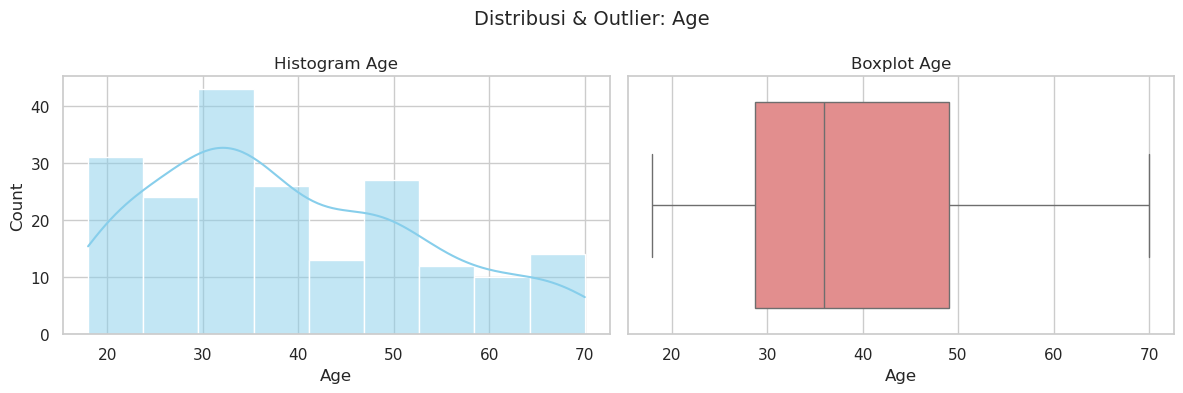

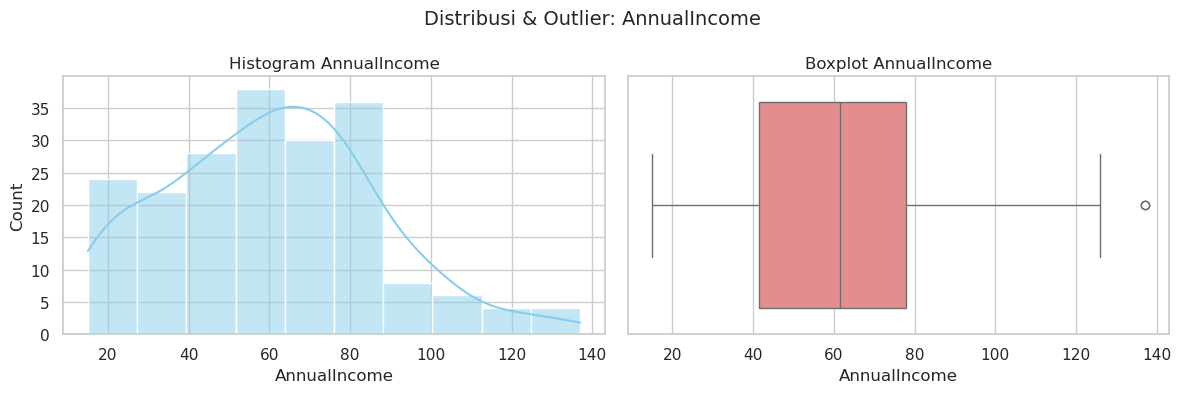

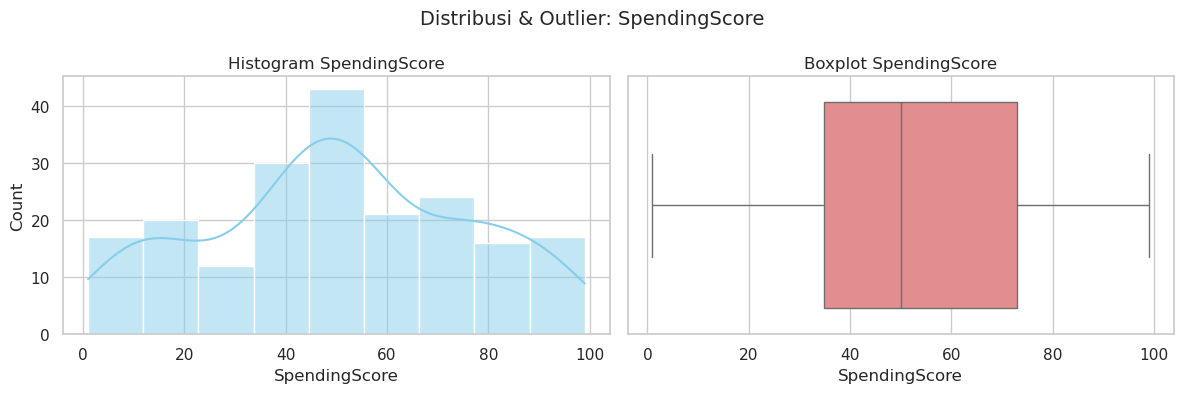

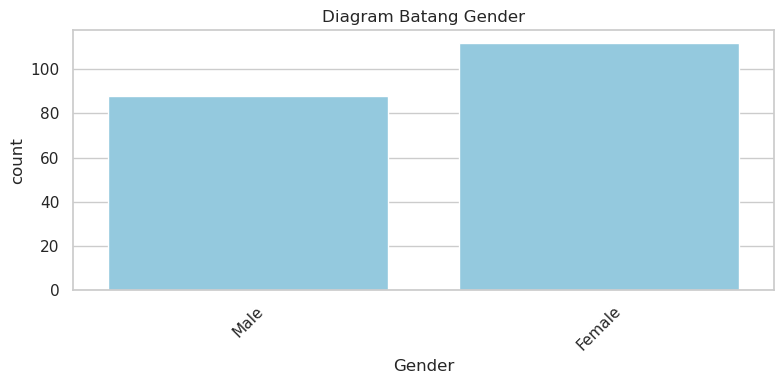

In [236]:
numerical_cols, categorical_cols = get_numerical_categorical_columns(df_clean, exclude_numeric_col=['CustomerID'])

plot_numerical_and_categorical(df_clean, numerical_cols, categorical_cols)

#### Dataset 2

Kolom Numerikal: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CHO', 'FAF', 'TUE']
Kolom Kategorikal: ['Gender', 'familyhistory', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


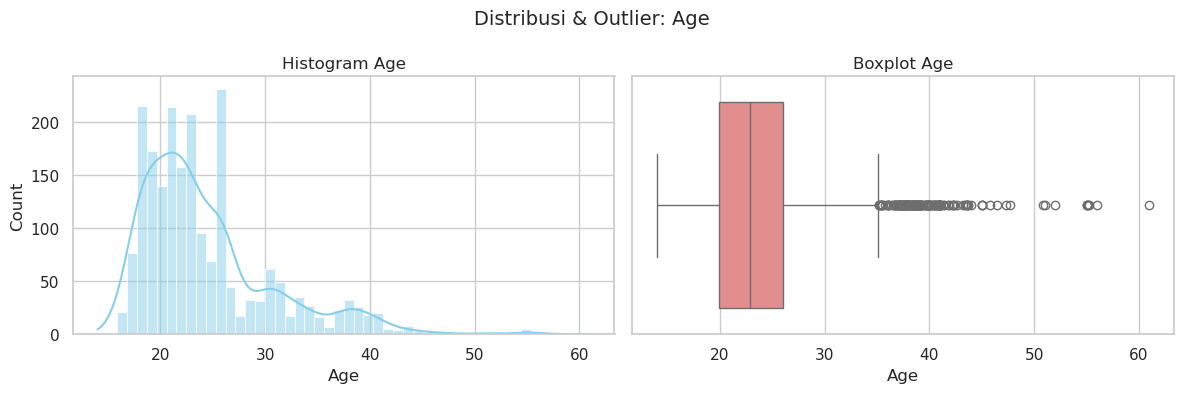

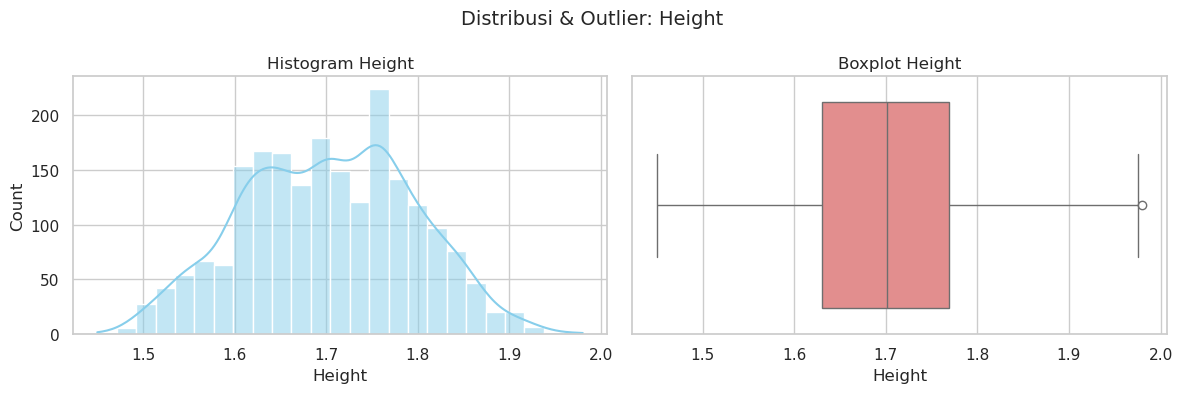

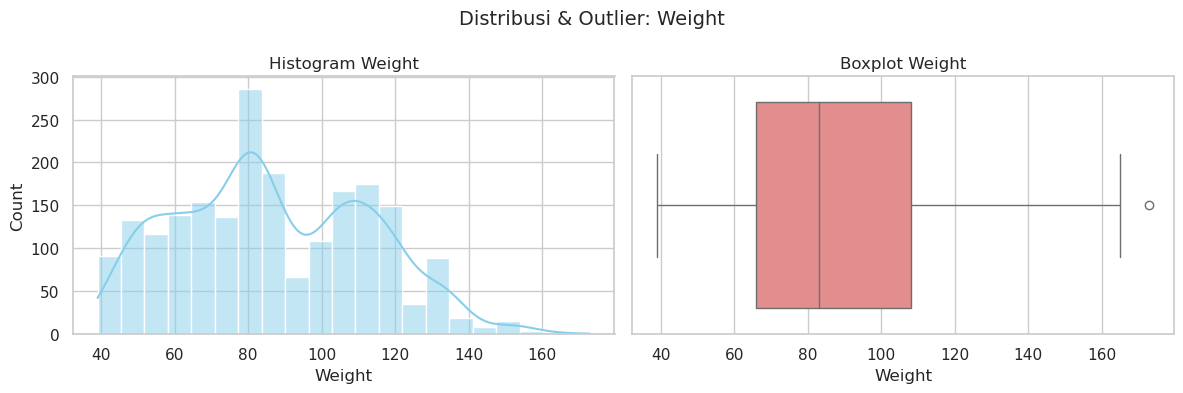

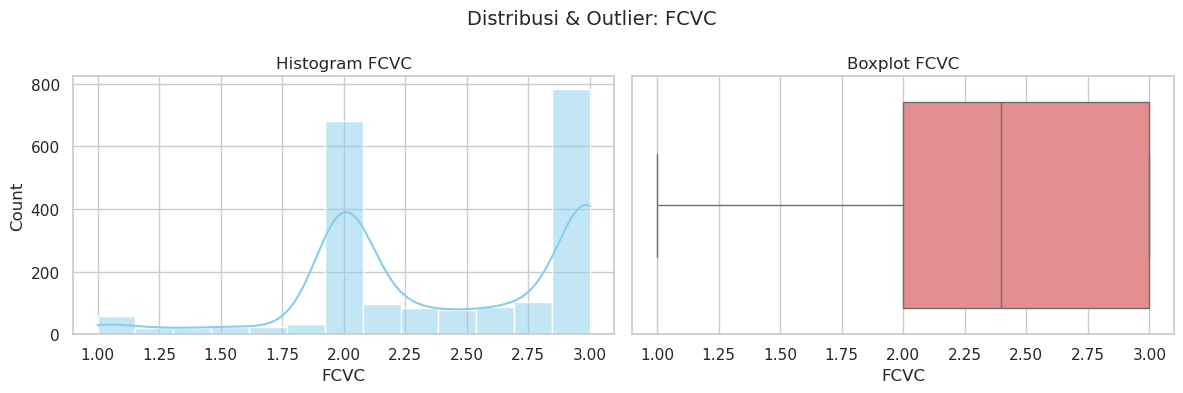

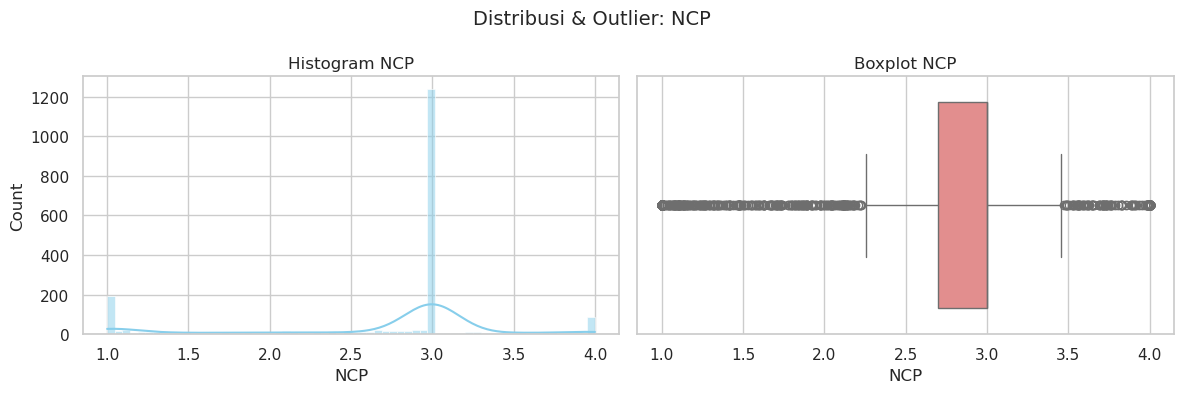

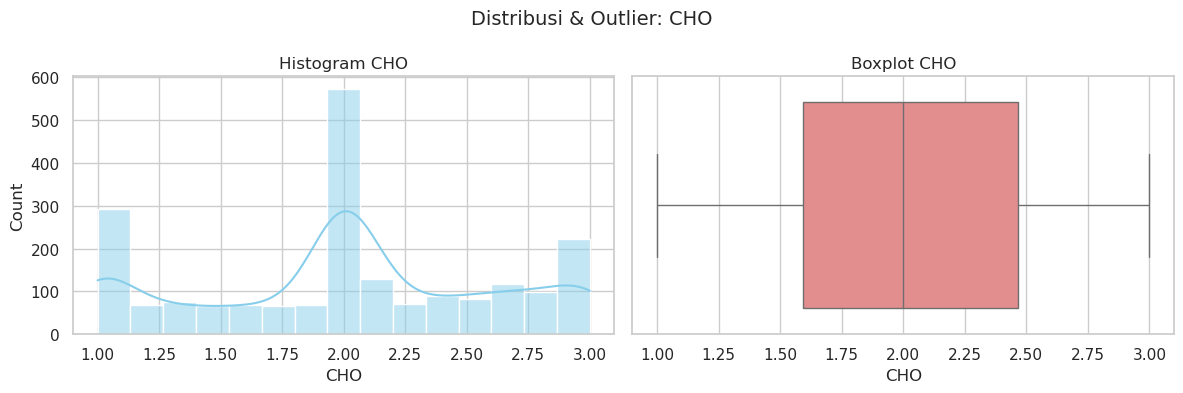

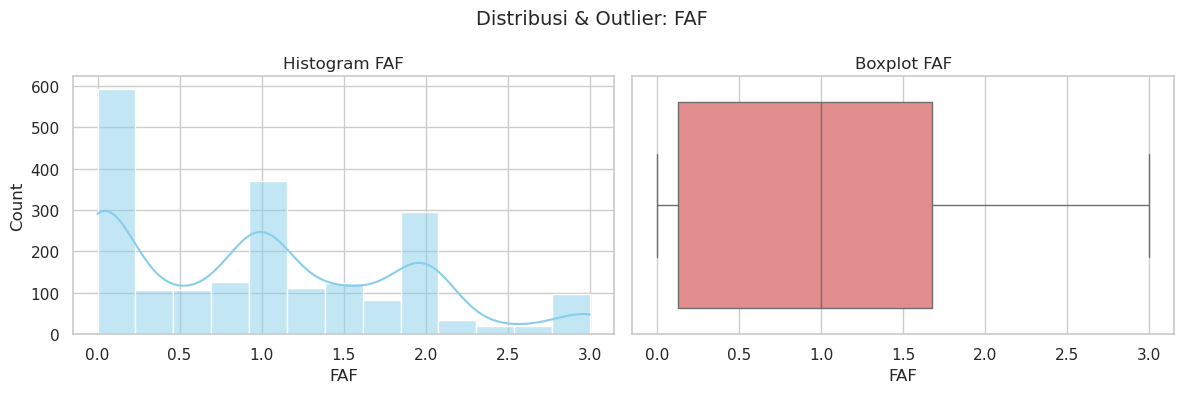

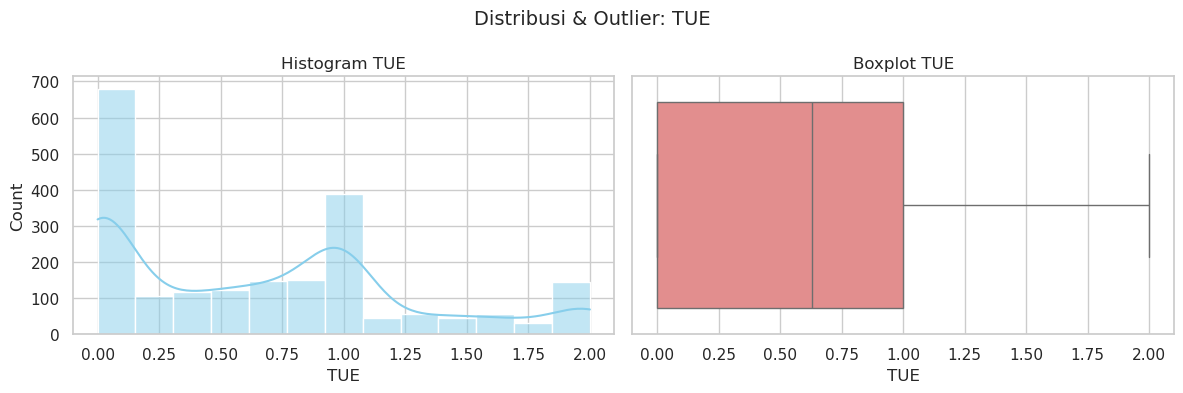

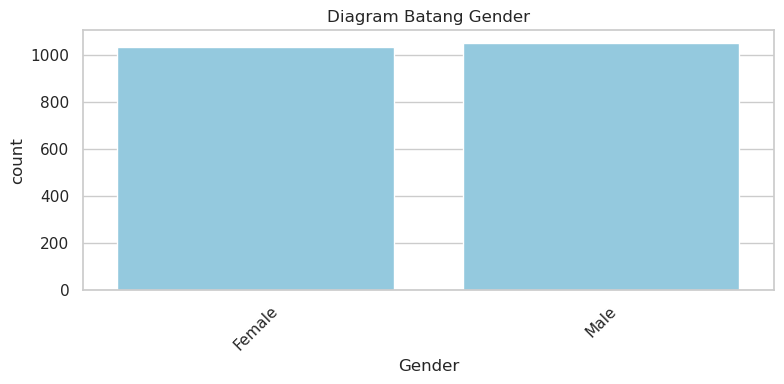

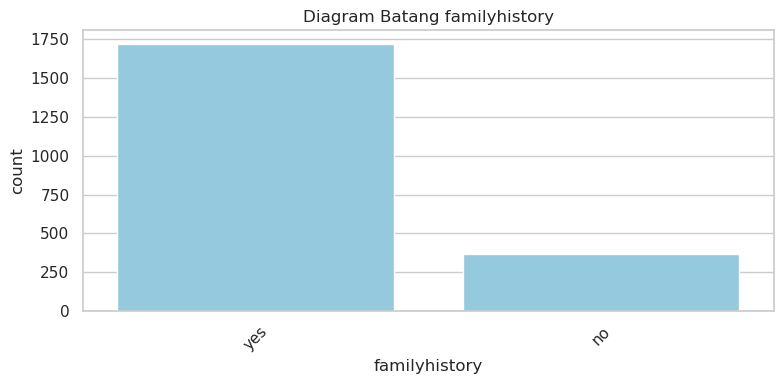

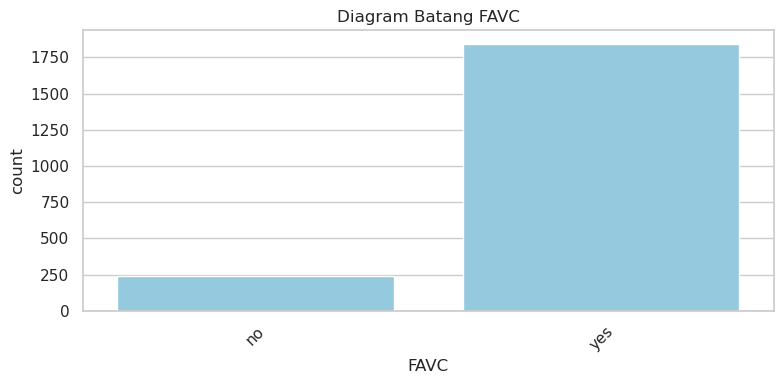

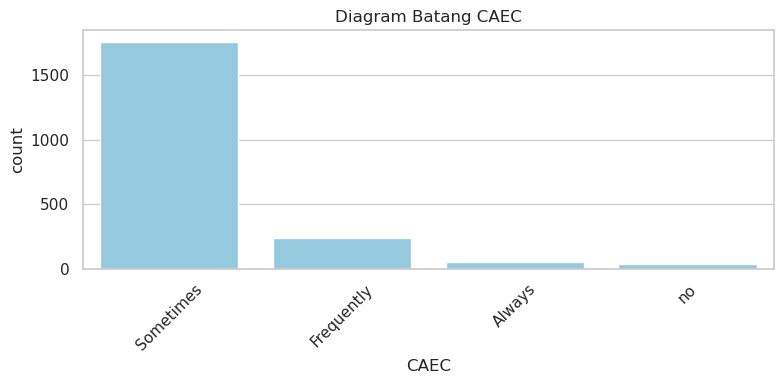

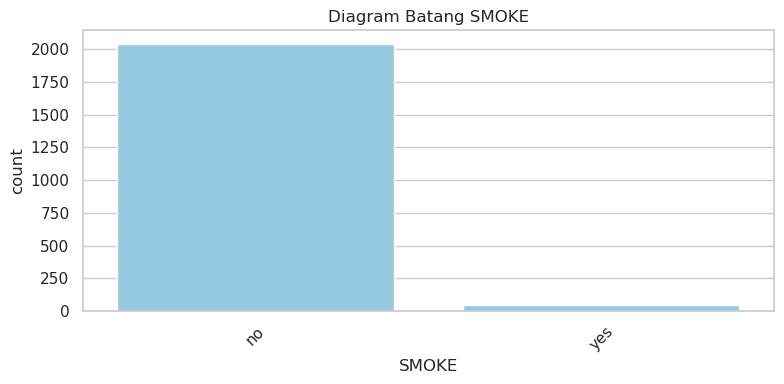

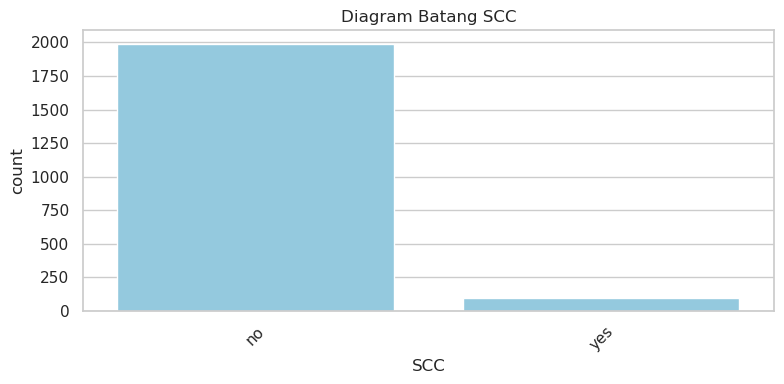

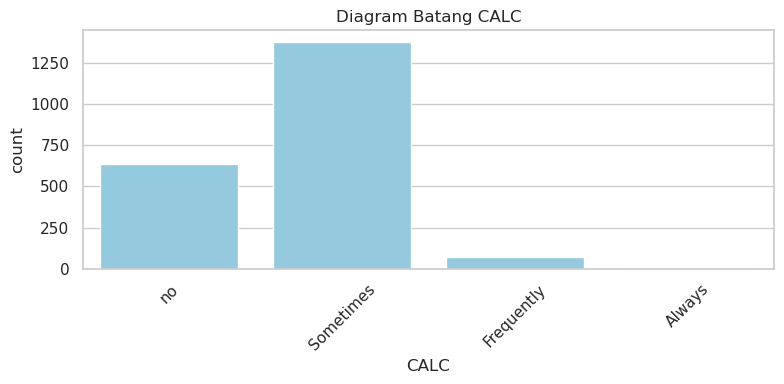

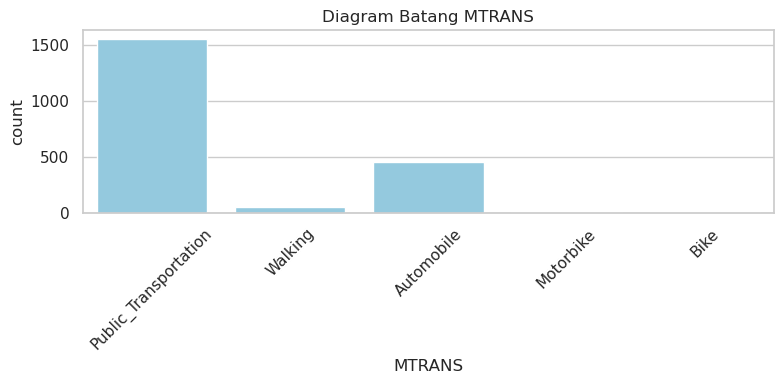

In [237]:
df2_numerical_cols, df2_categorical_cols = get_numerical_categorical_columns(df2_clean, exclude_categorical_col=['Obesity'])

plot_numerical_and_categorical(df2_clean, df2_numerical_cols, df2_categorical_cols)

## Feature Selection & Scaling

### Memilih Kolom

#### Dataset 1

In [238]:
df_clean.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [239]:
df_clean = df_clean.drop(columns=['CustomerID'])

df_clean.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

#### Dataset 2

In [240]:
df2_clean.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [241]:
df2_clean = df2_clean.drop(columns=['Obesity'])

df2_clean.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'familyhistory', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CHO', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

### Lakukan Label Encoding Untuk Kolom Binary Categorical

In [242]:
def label_encode(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Melakukan label encoding untuk daftar kolom kategorikal.
    Encoding akan bersifat manual berdasarkan urutan unik yang muncul pertama.

    Parameters
    -----------
    df : DataFrame
        DataFrame input (tidak akan dimodifikasi secara in-place).
    columns : list
        List nama kolom kategorikal yang ingin di-encode.

    Returns
    --------
    DataFrame baru dengan kolom tambahan hasil encoding.
    """
    if not columns:
        print("⚠️ Tidak ada kolom yang diberikan untuk label encoding.")
        return df.copy()

    df_encoded = df.copy()
    for col in columns:
        unique_vals = df_encoded[col].dropna().unique()

        mapping = {val: idx for idx, val in enumerate(unique_vals)}

        df_encoded[col + '_Encoded'] = df_encoded[col].map(mapping)
        print(f"Mapping untuk kolom '{col}': {mapping}")
        
    return df_encoded

#### Dataset 1

In [243]:
lbl_encode_cols = ["Gender"]

df_encoded = df_clean.copy()
df_encoded = label_encode(df_clean, lbl_encode_cols)

Mapping untuk kolom 'Gender': {'Male': 0, 'Female': 1}


In [244]:
df_encoded.head()

Gender  Age  AnnualIncome  SpendingScore  Gender_Encoded
0    Male   19            15             39               0
1    Male   21            15             81               0
2  Female   20            16              6               1
3  Female   23            16             77               1
4  Female   31            17             40               1

#### Dataset 2

In [245]:
df2_lbl_encode_cols = ["SCC", "SMOKE", "FAVC", "familyhistory", "Gender"]

df2_encoded = df2_clean.copy()
df2_encoded = label_encode(df2_clean, df2_lbl_encode_cols)

Mapping untuk kolom 'SCC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'SMOKE': {'no': 0, 'yes': 1}
Mapping untuk kolom 'FAVC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'familyhistory': {'yes': 0, 'no': 1}
Mapping untuk kolom 'Gender': {'Female': 0, 'Male': 1}


In [246]:
df2_encoded.head()

Gender   Age  Height  Weight familyhistory FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0           yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0           yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0           yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0            no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8            no   no   2.0  1.0  Sometimes   

  SMOKE  ...  SCC  FAF  TUE        CALC                 MTRANS SCC_Encoded  \
0    no  ...   no  0.0  1.0          no  Public_Transportation           0   
1   yes  ...  yes  3.0  0.0   Sometimes  Public_Transportation           1   
2    no  ...   no  2.0  1.0  Frequently  Public_Transportation           0   
3    no  ...   no  2.0  0.0  Frequently                Walking           0   
4    no  ...   no  0.0  0.0   Sometimes  Public_Transportation           0   

   SMOKE_Encoded  FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  
0              0             0                      0               0  
1              1             0                      0               0  
2              0             0                      0               1  
3              0             0                      1               1  
4              0             0                      1               1  

[5 rows x 21 columns]

### Lakukan Frequency Encoding Untuk Kolom Categorical

In [247]:
def frequency_encode(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Melakukan frequency encoding untuk beberapa kolom kategorikal.

    Parameters
    ----------
    df : DataFrame
        DataFrame input (tidak akan dimodifikasi secara in-place).
    columns : list
        List nama kolom kategorikal yang ingin di-encode.

    Returns
    ----------
    DataFrame baru dengan kolom tambahan hasil frequency encoding.
    """
    if not columns:
        print("⚠️ Tidak ada kolom yang diberikan untuk frequency encoding.")
        return df.copy()

    df_encoded = df.copy()
    for col in columns:
        freq_map = df_encoded[col].value_counts()
        df_encoded[col + '_FreqEncoded'] = df_encoded[col].map(freq_map)
        print(f"Top 5 Frequency Encoding untuk '{col}':\n{freq_map.head()}\n")
    return df_encoded

#### Dataset 1

In [248]:
freq_encode_cols = []

df_encoded = frequency_encode(df_encoded, freq_encode_cols)

⚠️ Tidak ada kolom yang diberikan untuk frequency encoding.


#### Dataset 2

In [249]:
df2_freq_encode_cols = ["CAEC", "CALC", "MTRANS"]

df2_encoded = frequency_encode(df2_encoded, df2_freq_encode_cols)

Top 5 Frequency Encoding untuk 'CAEC':
CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

Top 5 Frequency Encoding untuk 'CALC':
CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

Top 5 Frequency Encoding untuk 'MTRANS':
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64



In [250]:
df2_encoded.head()

Gender   Age  Height  Weight familyhistory FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0           yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0           yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0           yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0            no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8            no   no   2.0  1.0  Sometimes   

  SMOKE  ...        CALC                 MTRANS  SCC_Encoded  SMOKE_Encoded  \
0    no  ...          no  Public_Transportation            0              0   
1   yes  ...   Sometimes  Public_Transportation            1              1   
2    no  ...  Frequently  Public_Transportation            0              0   
3    no  ...  Frequently                Walking            0              0   
4    no  ...   Sometimes  Public_Transportation            0              0   

  FAVC_Encoded familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0            0                     0               0              1761   
1            0                     0               0              1761   
2            0                     0               1              1761   
3            0                     1               1              1761   
4            0                     1               1              1761   

   CALC_FreqEncoded  MTRANS_FreqEncoded  
0               636                1558  
1              1380                1558  
2                70                1558  
3                70                  55  
4              1380                1558  

[5 rows x 24 columns]

### drop kolom kategori karena sudah diencode

#### Dataset 1

In [251]:
df_encoded = df_encoded.drop(columns=categorical_cols)

df_encoded.head()

Age  AnnualIncome  SpendingScore  Gender_Encoded
0   19            15             39               0
1   21            15             81               0
2   20            16              6               1
3   23            16             77               1
4   31            17             40               1

#### Dataset 2

In [252]:
df2_encoded = df2_encoded.drop(columns=df2_categorical_cols)

df2_encoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC_Encoded  SMOKE_Encoded  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0            0              0   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0            1              1   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0            0              0   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0            0              0   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0            0              0   

   FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0             0                      0               0              1761   
1             0                      0               0              1761   
2             0                      0               1              1761   
3             0                      1               1              1761   
4             0                      1               1              1761   

   CALC_FreqEncoded  MTRANS_FreqEncoded  
0               636                1558  
1              1380                1558  
2                70                1558  
3                70                  55  
4              1380                1558

### lakukan data scalling (normalisasi)

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
scaler = StandardScaler()

#### Dataset 1

In [255]:
scaled_data = scaler.fit_transform(df_encoded[df_encoded.columns])
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

display(df_scaled.info())
display(df_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             200 non-null    float64
 1   AnnualIncome    200 non-null    float64
 2   SpendingScore   200 non-null    float64
 3   Gender_Encoded  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

Age  AnnualIncome  SpendingScore  Gender_Encoded
0 -1.424569     -1.738999      -0.434801       -1.128152
1 -1.281035     -1.738999       1.195704       -1.128152
2 -1.352802     -1.700830      -1.715913        0.886405
3 -1.137502     -1.700830       1.040418        0.886405
4 -0.563369     -1.662660      -0.395980        0.886405

#### Dataset 2

In [256]:
df2_scaled_data = scaler.fit_transform(df2_encoded[df2_encoded.columns])
df2_scaled = pd.DataFrame(df2_scaled_data, columns=df2_encoded.columns)

display(df2_scaled.info())
display(df2_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2087 non-null   float64
 1   Height                 2087 non-null   float64
 2   Weight                 2087 non-null   float64
 3   FCVC                   2087 non-null   float64
 4   NCP                    2087 non-null   float64
 5   CHO                    2087 non-null   float64
 6   FAF                    2087 non-null   float64
 7   TUE                    2087 non-null   float64
 8   SCC_Encoded            2087 non-null   float64
 9   SMOKE_Encoded          2087 non-null   float64
 10  FAVC_Encoded           2087 non-null   float64
 11  familyhistory_Encoded  2087 non-null   float64
 12  Gender_Encoded         2087 non-null   float64
 13  CAEC_FreqEncoded       2087 non-null   float64
 14  CALC_FreqEncoded       2087 non-null   float64
 15  MTRA

None

Age    Height    Weight      FCVC       NCP       CHO       FAF  \
0 -0.526613 -0.887408 -0.872985 -0.788364  0.390906 -0.007810 -1.186977   
1 -0.526613 -1.960788 -1.178508  1.082164  0.390906  1.636552  2.328908   
2 -0.212507  1.044677 -0.376509 -0.788364  0.390906 -0.007810  1.156947   
3  0.415705  1.044677  0.005395  1.082164  0.390906 -0.007810  1.156947   
4 -0.369560  0.830001  0.112328 -0.788364 -2.225418 -0.007810 -1.186977   

        TUE  SCC_Encoded  SMOKE_Encoded  FAVC_Encoded  familyhistory_Encoded  \
0  0.554211    -0.219584      -0.146755     -2.754719              -0.460394   
1 -1.090505     4.554073       6.814090     -2.754719              -0.460394   
2  0.554211    -0.219584      -0.146755     -2.754719              -0.460394   
3 -1.090505    -0.219584      -0.146755     -2.754719               2.172052   
4 -1.090505    -0.219584      -0.146755     -2.754719               2.172052   

   Gender_Encoded  CAEC_FreqEncoded  CALC_FreqEncoded  MTRANS_FreqEncoded  
0       -1.008179          0.429522         -1.206288            0.576897  
1       -1.008179          0.429522          0.692449            0.576897  
2        0.991887          0.429522         -2.650757            0.576897  
3        0.991887          0.429522         -2.650757           -2.374877  
4        0.991887          0.429522          0.692449            0.576897

### menampilkan similarity matrix

In [257]:
from sklearn.metrics.pairwise import cosine_similarity

def plot_cosine_similarity(
    df_scaled: pd.DataFrame, 
    title='Cosine Similarity Matrix antar Observasi', 
    suffix: str = ""
) -> None:
    """
    Menghitung dan mem-plot cosine similarity antar observasi pada DataFrame.
    
    Parameters
    ----------
        df_scaled (pd.DataFrame): DataFrame yang sudah diskalakan (numerik).
        title (str): Judul plot heatmap.
        suffix (str): Suffix untuk nama file output (jika diperlukan).
       
    Returns
    -------
    None
    plot 
    """
    # Hitung cosine similarity antar observasi (baris)
    similarity_matrix = cosine_similarity(df_scaled)
    
    # Ubah ke DataFrame agar bisa divisualisasikan
    similarity_df = pd.DataFrame(similarity_matrix,
                                 index=df_scaled.index,
                                 columns=df_scaled.index)
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_df, cmap='viridis', square=True)
    plt.title(title + suffix)
    plt.xlabel('Observasi')
    plt.ylabel('Observasi')
    plt.tight_layout()
    plt.show()

#### Dataset 1

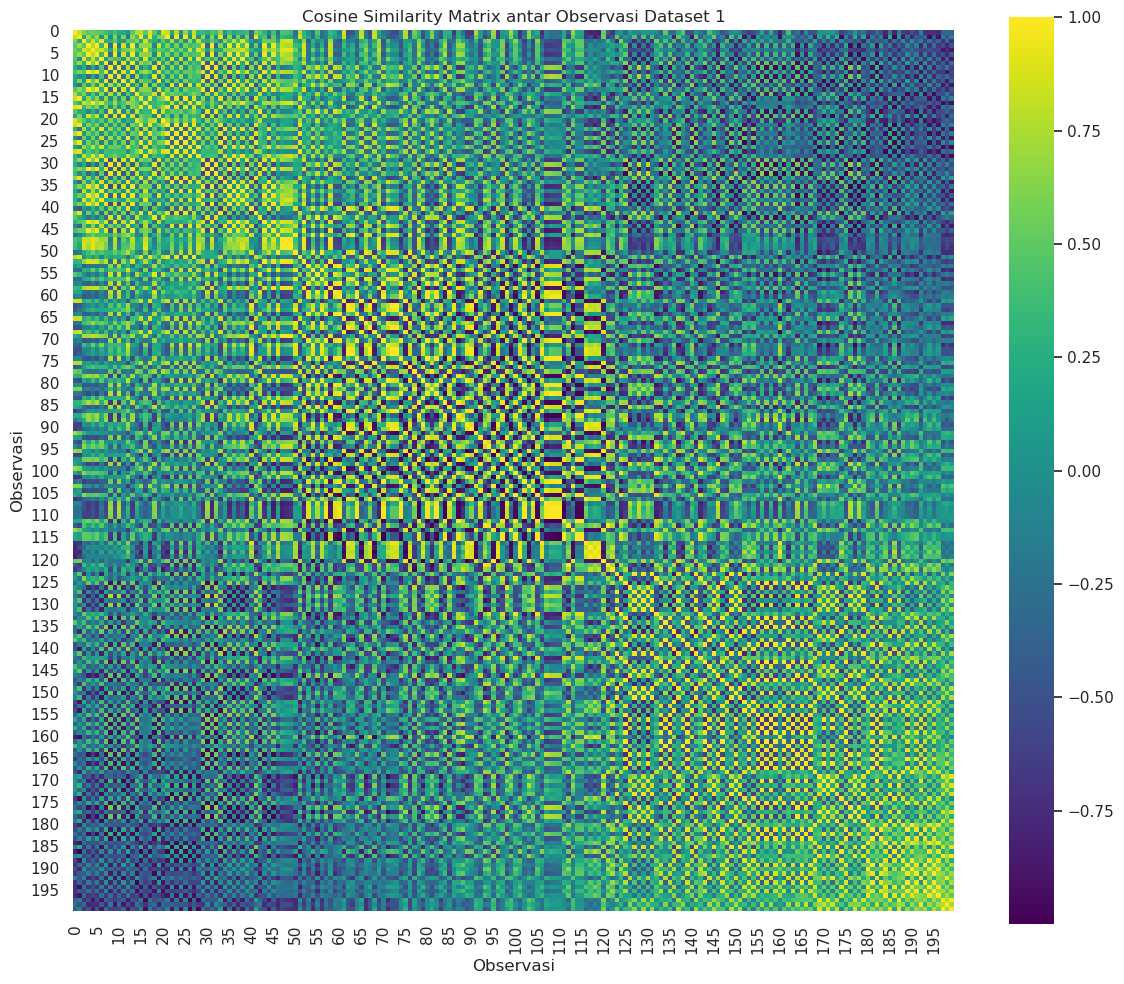

In [258]:
plot_cosine_similarity(df_scaled, suffix=" Dataset 1")

#### Dataset 2

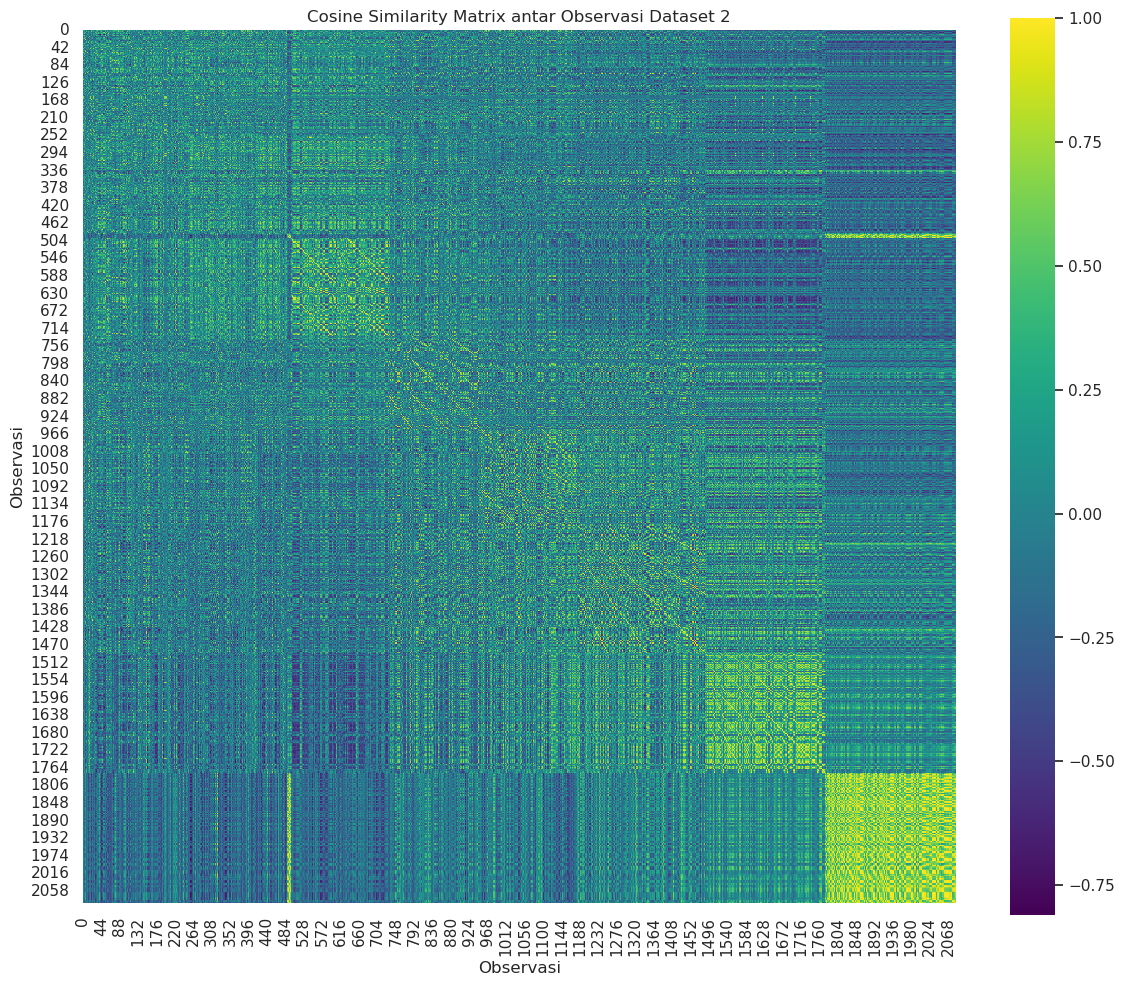

In [259]:
plot_cosine_similarity(df2_scaled, suffix=' Dataset 2')

## K-Means Clustering (CPU)

### Mencari K Optimal dengan Elbow Method

In [260]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [261]:
def plot_elbow_method(df_scaled: pd.DataFrame, k_min: int = 1, k_max: int = 11, random_state: int = 42) -> list:
    """
    Membuat plot Elbow Method untuk menentukan jumlah cluster optimal pada KMeans.
    
    Parameters
    ----------
    df_scaled : pd.DataFrame
        Data numerik yang sudah diskalakan.
    k_min : int, optional
        Nilai k terkecil, default 1
    k_max : int, optional
        Nilai k terbesar (exclusive), default 11
    random_state : int, optional
        Seed random untuk KMeans, default 42
        
    Returns
    -------
    list
        Daftar inertia untuk setiap nilai k yang diuji.
    """
    inertia = []
    k_range = range(k_min, k_max)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,5))
    plt.plot(list(k_range), inertia, 'bo-')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Inertia')
    plt.title('Metode Elbow untuk Penentuan k Optimal')
    plt.grid(True)
    plt.show()
    
    return inertia

In [262]:
def calculate_relative_scores(inertia: list) -> None:
    """
    Menghitung dan mencetak relative score penurunan inertia antar cluster pada Elbow Method.
    
    Args:
        inertia (list or array): List nilai inertia dari hasil KMeans untuk berbagai k.
    """
    for i in range(len(inertia) - 1):
        drop = (inertia[i] - inertia[i+1]) / inertia[i]
        print(f"Relative Score k={i+1} → k={i+2}: {drop:.2%}")

#### Dataset 1

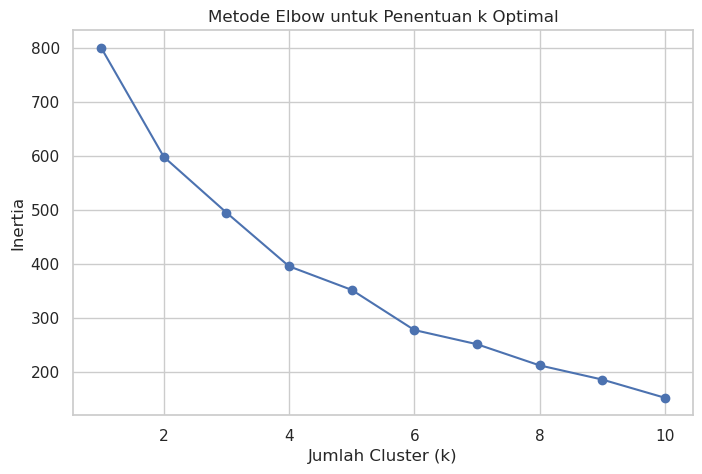

Relative Score k=1 → k=2: 25.26%
Relative Score k=2 → k=3: 17.25%
Relative Score k=3 → k=4: 20.09%
Relative Score k=4 → k=5: 11.04%
Relative Score k=5 → k=6: 21.14%
Relative Score k=6 → k=7: 9.46%
Relative Score k=7 → k=8: 15.60%
Relative Score k=8 → k=9: 12.39%
Relative Score k=9 → k=10: 18.14%


In [263]:
inertia = plot_elbow_method(df_scaled)
calculate_relative_scores(inertia)

#### Dataset 2

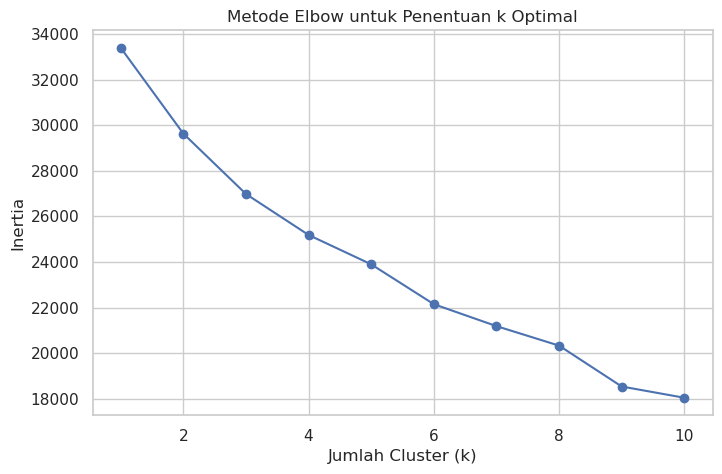

Relative Score k=1 → k=2: 11.26%
Relative Score k=2 → k=3: 8.94%
Relative Score k=3 → k=4: 6.66%
Relative Score k=4 → k=5: 5.11%
Relative Score k=5 → k=6: 7.31%
Relative Score k=6 → k=7: 4.34%
Relative Score k=7 → k=8: 4.04%
Relative Score k=8 → k=9: 8.81%
Relative Score k=9 → k=10: 2.66%


In [264]:
inertia = plot_elbow_method(df2_scaled)
calculate_relative_scores(inertia)

### Melakukan K-Means Clustering dengan K Optimal dan PCA

In [265]:
def apply_pca(df_scaled: pd.DataFrame, n_components: int = 2) -> pd.DataFrame:
    """
    Melakukan PCA pada DataFrame dan mengembalikan DataFrame hasil reduksi dimensi.
    
    Args
    ----
        df_scaled (pd.DataFrame): Data numerik yang sudah diskalakan.
        n_components (int): Jumlah komponen utama yang diambil.
        
    Returns
    ----
        pd.DataFrame: DataFrame dengan kolom PC1, PC2, ..., PCn.
    """
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(df_scaled)
    columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(pca_data, columns=columns, index=df_scaled.index)
    return df_pca

#### Dataset 1

In [266]:
df_pca = apply_pca(df_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels

#### Dataset 2

In [267]:
df2_pca = apply_pca(df2_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
df2_cluster_labels = kmeans.fit_predict(df2_pca)

df2_pca['Cluster'] = df2_cluster_labels

### Plotting Hasil K-Means Clustering

In [268]:
def plot_pca_clusters(
    df_pca: pd.DataFrame, 
    x_col='PC1', 
    y_col='PC2', 
    cluster_col='Cluster', 
    title='KMeans Clustering dengan PCA',
    suffix: str = "",
) -> None:
    """
    Membuat scatter plot hasil clustering dengan PCA.
    
    Args:
        df_pca (pd.DataFrame): DataFrame hasil PCA dan clustering.
        x_col (str): Nama kolom untuk sumbu X.
        y_col (str): Nama kolom untuk sumbu Y.
        cluster_col (str): Nama kolom cluster.
        title (str): Judul plot.
        figsize (tuple): Ukuran figure.
        palette (str): Palet warna.
        s (int): Ukuran marker.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=x_col, y=y_col, hue=cluster_col, palette='viridis', data=df_pca
    )
    plt.title(title + suffix)
    plt.show()

#### Dataset 1

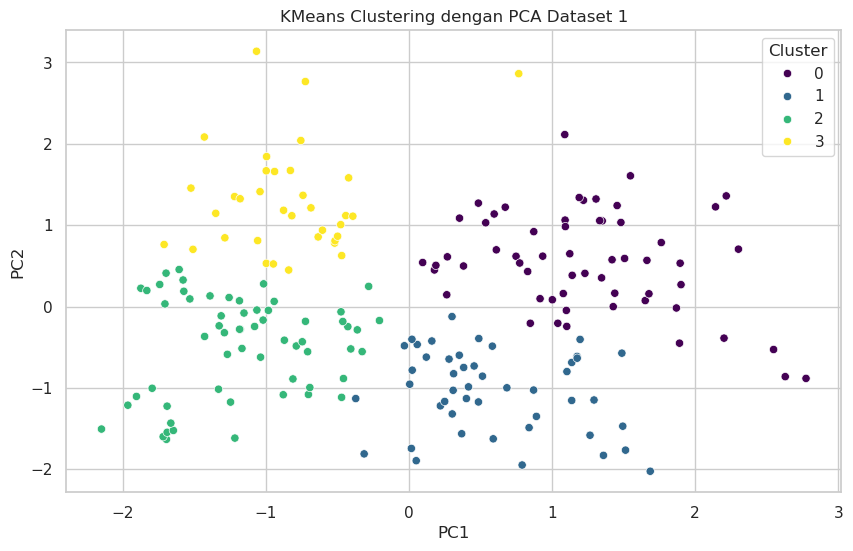

In [269]:
plot_pca_clusters(
    df_pca, 
    suffix=' Dataset 1'
)

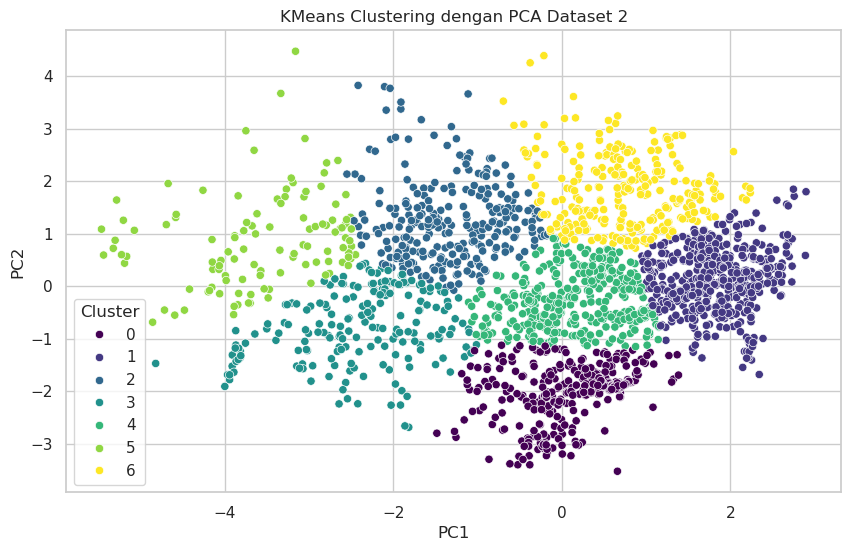

In [270]:
plot_pca_clusters(
    df2_pca, 
    suffix=' Dataset 2'
)

### Menampilkan Silhouette Score

In [271]:
from sklearn.metrics import silhouette_score

#### Dataset 1

In [272]:
print(f'Silhouette Score: {silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster']):.4f}')

Silhouette Score: 0.4123


#### Dataset 2

In [273]:
print(f'Silhouette Score: {silhouette_score(df2_pca[['PC1', 'PC2']], df2_pca['Cluster']):.4f}')

Silhouette Score: 0.3898


## Interpretation

### Masukan Hasil Clustering ke dalam DataFrame Encoded

#### Dataset 1

In [274]:
df_encoded['Cluster'] = cluster_labels

df_encoded.head()

Age  AnnualIncome  SpendingScore  Gender_Encoded  Cluster
0   19            15             39               0        2
1   21            15             81               0        2
2   20            16              6               1        1
3   23            16             77               1        2
4   31            17             40               1        1

#### Dataset 2

In [275]:
df2_encoded['Cluster'] = df2_cluster_labels

df2_encoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC_Encoded  SMOKE_Encoded  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0            0              0   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0            1              1   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0            0              0   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0            0              0   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0            0              0   

   FAVC_Encoded  familyhistory_Encoded  Gender_Encoded  CAEC_FreqEncoded  \
0             0                      0               0              1761   
1             0                      0               0              1761   
2             0                      0               1              1761   
3             0                      1               1              1761   
4             0                      1               1              1761   

   CALC_FreqEncoded  MTRANS_FreqEncoded  Cluster  
0               636                1558        3  
1              1380                1558        5  
2                70                1558        6  
3                70                  55        2  
4              1380                1558        2

### Interpretasi Hasil Clustering Kolom Numerikal

In [276]:
def summarize_clusters(
    df: pd.DataFrame, 
    categorical_encoded_cols: list,
    cluster_col: str = "Cluster"
) -> pd.DataFrame:
    """
    Menghasilkan ringkasan kategori (Very Low, Low, Medium, High) untuk setiap fitur numerik per cluster.

    Args:
        df (pd.DataFrame): DataFrame yang sudah diencoding dan memiliki kolom cluster.
        cluster_col (str): Nama kolom cluster.
        categorical_encoded_cols (list): Daftar kolom kategorikal yang sudah diencoding.

    Returns:
        pd.DataFrame: DataFrame ringkasan kategori per cluster.
    """
    # Ambil fitur numerik asli (tanpa encoded & cluster)
    features_to_summarize = df.drop(columns=categorical_encoded_cols + [cluster_col]).columns
    cluster_means = df.groupby(cluster_col)[features_to_summarize].mean()

    # Ambil kuartil dari keseluruhan dataset (bukan per cluster)
    quantiles = df[features_to_summarize].quantile([0.25, 0.5, 0.75])

    # Fungsi untuk mengubah nilai rata-rata menjadi label kategori
    def categorize(value, feature):
        if value < quantiles.loc[0.25, feature]:
            return "Very Low"
        elif value < quantiles.loc[0.5, feature]:
            return "Low"
        elif value < quantiles.loc[0.75, feature]:
            return "Medium"
        else:
            return "High"

    # Terapkan ke semua nilai dalam cluster_means
    categorized_summary = cluster_means.copy()
    for feature in features_to_summarize:
        categorized_summary[feature] = cluster_means[feature].apply(lambda x: categorize(x, feature))

    return categorized_summary

#### Dataset 1

In [277]:
categorical_encoded_to_summarize = [col + "_Encoded" for col in lbl_encode_cols] + [col + "_FreqEncoded" for col in freq_encode_cols]

summarize_clusters(df_encoded, categorical_encoded_to_summarize)

Age AnnualIncome SpendingScore
Cluster                                     
0            High       Medium      Very Low
1          Medium          Low           Low
2        Very Low          Low        Medium
3             Low         High        Medium

| 🧭 Cluster | 🎯 Segment Name         | Age      | Annual Income | Spending Score | 📝 Description                                                                                                                |
| ---------- | ----------------------- | -------- | ------------- | -------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **0**      | 🧓 Senior Hemat         | High     | Medium        | Very Low       | Pelanggan usia lanjut dengan pendapatan cukup tetapi pola belanja sangat hemat. Kemungkinan fokus pada tabungan atau pensiun. |
| **1**      | 👴 Tradisional Ekonomis | Medium   | Low           | Low            | Pelanggan usia menengah dengan penghasilan dan pengeluaran rendah. Cenderung berhati-hati dalam berbelanja.                   |
| **2**      | 👶 Muda Berkembang      | Very Low | Low           | Medium         | Pelanggan sangat muda dengan pendapatan rendah namun mulai aktif berbelanja. Potensial untuk segmen tumbuh.                   |
| **3**      | 🧑 Profesional Muda     | Low      | High          | Medium         | Pelanggan muda dengan pendapatan tinggi dan pengeluaran cukup besar. Menunjukkan gaya hidup konsumtif kelas menengah ke atas. |

#### Dataset 2

In [278]:
df2_categorical_encoded_to_summarize = [col + "_Encoded" for col in df2_lbl_encode_cols] + [col + "_FreqEncoded" for col in df2_freq_encode_cols]

summarize_clusters(df2_encoded, df2_categorical_encoded_to_summarize)

Age    Height    Weight    FCVC       NCP     CHO     FAF     TUE
Cluster                                                                      
0          High  Very Low    Medium  Medium  Very Low     Low     Low     Low
1          High      High      High  Medium       Low  Medium  Medium     Low
2           Low       Low  Very Low     Low       Low     Low  Medium  Medium
3           Low  Very Low  Very Low  Medium  Very Low     Low     Low  Medium
4        Medium       Low    Medium  Medium  Very Low     Low     Low  Medium
5           Low  Very Low  Very Low  Medium       Low     Low  Medium  Medium
6           Low      High       Low     Low       Low  Medium    High  Medium

| 🧭 Cluster | 🎯 Segment Name           | Age      | Height    | Weight    | FCVC     | NCP      | CHO      | FAF      | TUE      | 📝 Description                                                                                      |
| ---------- | ------------------------ | -------- | --------- | --------- | -------- | -------- | -------- | -------- | -------- | --------------------------------------------------------------------------------------------------- |
| **0**      | 🧓 Senior Kurang Aktif   | High     | Very Low  | Medium    | Medium   | Very Low | Low      | Low      | Low      | Kelompok usia lanjut dengan tinggi badan sangat rendah, aktivitas fisik dan konsumsi makanan sehat rendah. Berisiko obesitas akibat pola hidup kurang aktif. |
| **1**      | 🧑 Dewasa Aktif          | High     | High      | High      | Medium   | Low      | Medium   | Medium   | Low      | Usia dewasa dengan tinggi dan berat badan tinggi, cukup aktif secara fisik dan konsumsi makanan sehat sedang. Potensi menjaga berat badan stabil.           |
| **2**      | 👦 Remaja Kurang Gizi    | Low      | Low       | Very Low  | Low      | Low      | Low      | Medium   | Medium   | Usia muda dengan tinggi dan berat badan sangat rendah, aktivitas fisik sedang. Berisiko kekurangan gizi.                                                    |
| **3**      | 👧 Anak Kurang Aktif     | Low      | Very Low  | Very Low  | Medium   | Very Low | Low      | Low      | Medium   | Anak-anak dengan tinggi dan berat badan sangat rendah, aktivitas fisik rendah, konsumsi makanan sehat sedang.                                               |
| **4**      | 🧑 Dewasa Sedang         | Medium   | Low       | Medium    | Medium   | Very Low | Low      | Low      | Medium   | Usia dewasa dengan tinggi dan berat badan sedang, aktivitas fisik dan konsumsi makanan sehat rendah.                                                        |
| **5**      | 👦 Remaja Pasif          | Low      | Very Low  | Very Low  | Medium   | Low      | Low      | Medium   | Medium   | Remaja dengan tinggi dan berat badan sangat rendah, aktivitas fisik sedang, konsumsi makanan sehat rendah.                                                  |
| **6**      | 🏃 Atlet Muda            | Low      | High      | Low       | Low      | Low      | Medium   | High     | Medium   | Usia muda dengan tinggi badan tinggi, berat badan rendah, sangat aktif secara fisik, konsumsi makanan sehat sedang.                                          |

**Catatan:**  
- FCVC: Frekuensi konsumsi sayur dan buah  
- NCP: Jumlah makanan utama per hari  
- CHO: Konsumsi karbohidrat  
- FAF: Frekuensi aktivitas fisik  
- TUE: Waktu menggunakan perangkat elektronik

### Interpretasi Hasil Clustering Kolom Encoded

In [279]:
def summarize_categorical_by_cluster(df: pd.DataFrame, cat_cols: list) -> None:
  for cat_col in cat_cols:
    # Hitung jumlah
    summary_count = df.groupby(["Cluster", cat_col], observed=True).size().unstack(fill_value=0)

    # Hitung persentase
    summary_pct = summary_count.div(summary_count.sum(axis=1), axis=0) * 100

    # Tambahkan total anggota per cluster
    summary_count['Total'] = summary_count.sum(axis=1)
    summary_pct['Total'] = 100.0  # karena persentase total selalu 100

    print(f"\nPersentase untuk kolom '{cat_col}' per cluster:")
    display(summary_pct.round(2))

In [280]:
def decode_categorical_columns(df_encoded: pd.DataFrame, df: pd.DataFrame, categorical_encoded: list) -> pd.DataFrame:
    """
    Mengembalikan kolom kategorikal yang telah diencoding ke bentuk aslinya.
    
    Parameters
    ----------
    df_encoded : pd.DataFrame
        DataFrame yang berisi kolom-kolom yang telah diencoding.
    df : pd.DataFrame
        DataFrame asli yang berisi kolom-kolom kategorikal sebelum encoding.
    categorical_encoded : list
        Daftar nama kolom kategorikal yang telah diencoding (baik label encoding maupun frequency encoding).
        
    Returns
    -------
    pd.DataFrame
        DataFrame dengan kolom-kolom yang telah didecode.
    """
    df_decoded = df_encoded.copy()
    for cat_col in categorical_encoded:
        df_decoded[cat_col] = df[cat_col.replace('_Encoded', '').replace('_FreqEncoded', '')]
        df_decoded[cat_col] = df_decoded[cat_col].astype('category')
        
    # Gantikan nama kolom kategorikal yang sudah diencoding
    df_decoded.rename(columns={col: col.replace('_Encoded', '').replace('_FreqEncoded', '') for col in categorical_encoded}, inplace=True)
    
    return df_decoded

#### Dataset 1

In [281]:
df_decoded = decode_categorical_columns(df_encoded, df, categorical_encoded_to_summarize)
df_decoded.head()

Age  AnnualIncome  SpendingScore  Gender  Cluster
0   19            15             39    Male        2
1   21            15             81    Male        2
2   20            16              6  Female        1
3   23            16             77  Female        2
4   31            17             40  Female        1

In [282]:
summarize_categorical_by_cluster(df_decoded, lbl_encode_cols + freq_encode_cols)


Persentase untuk kolom 'Gender' per cluster:


Gender   Female   Male  Total
Cluster                      
0         22.41  77.59  100.0
1         93.62   6.38  100.0
2         81.67  18.33  100.0
3         17.14  82.86  100.0

| Cluster | Gender (F/M %)        |
| ------- | --------------------- |
| 0       | 👩 22.41% / 👨 77.59% |
| 1       | 👩 93.62% / 👨 6.38%  |
| 2       | 👩 81.67% / 👨 18.33% |
| 3       | 👩 17.14% / 👨 82.86% |


#### Dataset 2

In [283]:
df2_decoded = decode_categorical_columns(df2_encoded, df2, df2_categorical_encoded_to_summarize)
df2_decoded.head()

Age  Height  Weight  FCVC  NCP  CHO  FAF  TUE  SCC SMOKE FAVC  \
0  21.0    1.62    64.0   2.0  3.0  2.0  0.0  1.0   no    no   no   
1  21.0    1.52    56.0   3.0  3.0  3.0  3.0  0.0  yes   yes   no   
2  23.0    1.80    77.0   2.0  3.0  2.0  2.0  1.0   no    no   no   
3  27.0    1.80    87.0   3.0  3.0  2.0  2.0  0.0   no    no   no   
4  22.0    1.78    89.8   2.0  1.0  2.0  0.0  0.0   no    no   no   

  familyhistory  Gender       CAEC        CALC                 MTRANS  Cluster  
0           yes  Female  Sometimes          no  Public_Transportation        3  
1           yes  Female  Sometimes   Sometimes  Public_Transportation        5  
2           yes    Male  Sometimes  Frequently  Public_Transportation        6  
3            no    Male  Sometimes  Frequently                Walking        2  
4            no    Male  Sometimes   Sometimes  Public_Transportation        2

In [284]:
summarize_categorical_by_cluster(df2_decoded, df2_lbl_encode_cols + df2_freq_encode_cols)


Persentase untuk kolom 'SCC' per cluster:


SCC          no    yes  Total
Cluster                      
0        100.00   0.00  100.0
1        100.00   0.00  100.0
2         92.59   7.41  100.0
3         90.31   9.69  100.0
4        100.00   0.00  100.0
5         55.26  44.74  100.0
6         97.80   2.20  100.0


Persentase untuk kolom 'SMOKE' per cluster:


SMOKE       no   yes  Total
Cluster                    
0        99.16  0.84  100.0
1        97.03  2.97  100.0
2        95.93  4.07  100.0
3        97.96  2.04  100.0
4        98.92  1.08  100.0
5        98.25  1.75  100.0
6        98.17  1.83  100.0


Persentase untuk kolom 'FAVC' per cluster:


FAVC        no    yes  Total
Cluster                     
0         2.23  97.77  100.0
1         1.39  98.61  100.0
2        23.70  76.30  100.0
3        26.53  73.47  100.0
4         3.51  96.49  100.0
5        62.28  37.72  100.0
6        10.26  89.74  100.0


Persentase untuk kolom 'familyhistory' per cluster:


familyhistory     no     yes  Total
Cluster                            
0               1.11   98.89  100.0
1               0.00  100.00  100.0
2              51.11   48.89  100.0
3              48.98   51.02  100.0
4               2.97   97.03  100.0
5              83.33   16.67  100.0
6               7.69   92.31  100.0


Persentase untuk kolom 'Gender' per cluster:


Gender   Female   Male  Total
Cluster                      
0         96.10   3.90  100.0
1         19.80  80.20  100.0
2         45.56  54.44  100.0
3         96.43   3.57  100.0
4         44.32  55.68  100.0
5         92.98   7.02  100.0
6          2.93  97.07  100.0


Persentase untuk kolom 'CAEC' per cluster:


CAEC     Always  Frequently  Sometimes    no  Total
Cluster                                            
0          0.28        0.84      98.89  0.00  100.0
1          0.00        0.20      99.80  0.00  100.0
2          7.41       34.44      48.89  9.26  100.0
3          3.57       25.51      67.86  3.06  100.0
4          0.81        1.89      97.30  0.00  100.0
5         10.53       50.88      34.21  4.39  100.0
6          3.66        8.79      87.18  0.37  100.0


Persentase untuk kolom 'CALC' per cluster:


CALC     Always  Frequently  Sometimes     no  Total
Cluster                                             
0          0.00        0.28      81.06  18.66  100.0
1          0.00        1.78      91.68   6.53  100.0
2          0.37        7.04      54.81  37.78  100.0
3          0.00        2.55      53.57  43.88  100.0
4          0.00        4.32      52.16  43.51  100.0
5          0.00        6.14      50.88  42.98  100.0
6          0.00        4.76      44.69  50.55  100.0


Persentase untuk kolom 'MTRANS' per cluster:


MTRANS   Automobile  Bike  Motorbike  Public_Transportation  Walking  Total
Cluster                                                                    
0             37.60  0.00       0.56                  61.56     0.28  100.0
1             32.87  0.20       0.00                  65.54     1.39  100.0
2              6.67  1.11       1.11                  84.81     6.30  100.0
3              9.18  0.00       0.51                  86.73     3.57  100.0
4             12.97  0.00       0.81                  84.86     1.35  100.0
5              5.26  0.00       0.00                  91.23     3.51  100.0
6             23.81  1.10       0.73                  69.23     5.13  100.0

### Melihat Persebaran Cluster

In [285]:
cluster_percentages = (
    df_encoded['Cluster']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)

# Ubah menjadi DataFrame agar lebih rapi
cluster_stats = cluster_percentages.reset_index()
cluster_stats.columns = ['Cluster', 'Percentage (%)']

cluster_stats

Cluster  Percentage (%)
0        2            30.0
1        0            29.0
2        1            23.5
3        3            17.5

👶 **Cluster 2: Muda Berkembang (30.0%)**
- **Profil:** Sebagian besar wanita sangat muda, pendapatan rendah, mulai aktif berbelanja (👩 81.67% / 👨 18.33%).
- **Strategi:** Bangun loyalitas sejak dini dengan program member pemula, edukasi gaya hidup, dan promosi tren kekinian.
- **Aksi:** Adakan event komunitas muda, promo cashback, dan kolaborasi dengan brand fashion/teknologi entry-level.

---

🧓 **Cluster 0: Senior Hemat (29.0%)**
- **Profil:** Mayoritas pria usia lanjut, pendapatan menengah, sangat hemat dalam berbelanja (👩 22.41% / 👨 77.59%).
- **Strategi:** Tawarkan program loyalitas berbasis tabungan, diskon khusus lansia, dan fasilitas kenyamanan (misal: lounge senior, konsultasi keuangan).
- **Aksi:** Adakan event kesehatan, seminar pensiun, dan promosi produk kebutuhan pokok dengan harga spesial.

---

👴 **Cluster 1: Tradisional Ekonomis (23.5%)**
- **Profil:** Didominasi wanita usia menengah, penghasilan dan pengeluaran rendah, sangat berhati-hati dalam belanja (👩 93.62% / 👨 6.38%).
- **Strategi:** Fokus pada produk kebutuhan sehari-hari dengan harga terjangkau dan promo bundling.
- **Aksi:** Sediakan paket hemat, diskon belanja bulanan, dan edukasi keuangan keluarga.

---

🧑 **Cluster 3: Profesional Muda (17.5%)**
- **Profil:** Mayoritas pria muda, pendapatan tinggi, pengeluaran cukup besar, gaya hidup konsumtif (👩 17.14% / 👨 82.86%).
- **Strategi:** Tawarkan produk premium, pengalaman belanja eksklusif, dan fasilitas gaya hidup modern.
- **Aksi:** Launching produk baru, event networking, akses VIP, dan promo gadget/fashion kelas atas.

---

**Kesimpulan Umum:**  
Mall Anda memiliki segmen pelanggan yang sangat beragam, mulai dari senior hemat hingga profesional muda konsumtif. Untuk memaksimalkan potensi setiap segmen, lakukan pendekatan yang personal dan relevan sesuai karakteristik demografis dan perilaku belanja masing-masing cluster. Diversifikasi program promosi dan fasilitas akan meningkatkan loyalitas dan nilai transaksi di seluruh segmen pelanggan.
